In [ ]:
# Install library (jika belum)
!pip install gym imageio pygame -q


In [ ]:
# Import dan setup environment custom
import gym
import numpy as np
import imageio
import matplotlib.pyplot as plt
from IPython.display import Image

# Peta custom sesuai gambar
custom_map = [
    "SFFF",
    "FHFH",
    "FFFH",
    "HHFG"
]

# Buat environment
env = gym.make("FrozenLake-v1", desc=custom_map, is_slippery=False, render_mode="rgb_array")


In [ ]:
action_space_size = env.action_space.n
state_space_size = env.observation_space.n
q_table = np.zeros((state_space_size, action_space_size))

# Hyperparameter Q-Learning
num_episodes = 10000
max_steps = 100
learning_rate = 0.1
discount_rate = 0.99
exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 0.01
exploration_decay_rate = 0.001

rewards_all_episodes = []

# Pelatihan Q-Learning
for episode in range(num_episodes):
    state, _ = env.reset()
    done = False
    rewards_current_episode = 0

    for step in range(max_steps):
        exploration_threshold = np.random.uniform(0, 1)
        if exploration_threshold > exploration_rate:
            action = np.argmax(q_table[state, :])
        else:
            action = env.action_space.sample()

        new_state, reward, done, _, _ = env.step(action)

        q_table[state, action] = (1 - learning_rate) * q_table[state, action] + \
            learning_rate * (reward + discount_rate * np.max(q_table[new_state, :]))

        state = new_state
        rewards_current_episode += reward

        if done:
            break

    exploration_rate = min_exploration_rate + \
        (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate * episode)
    rewards_all_episodes.append(rewards_current_episode)


In [ ]:
frames = []
state, _ = env.reset()
done = False

for _ in range(100):
    frame = env.render()
    frames.append(frame)

    action = np.argmax(q_table[state, :])
    state, reward, done, _, _ = env.step(action)

    if done:
        frames.append(env.render())
        break

# Simpan sebagai GIF
imageio.mimsave("/content/frozenlake_agent.gif", frames, duration=0.5)
Image(filename="/content/frozenlake_agent.gif")


In [ ]:
# Simpan sebagai MP4 (opsional)
imageio.mimsave("/content/frozenlake_agent.mp4", frames, fps=1)

# Unduh jika perlu
from google.colab import files
files.download("/content/frozenlake_agent.mp4")


In [ ]:
%%capture
!pip install pyglet==1.5.1
!apt install python-opengl
!apt install ffmpeg
!apt install xvfb
!pip3 install pyvirtualdisplay

# Virtual display
from pyvirtualdisplay import Display

virtual_display = Display(visible=0, size=(1400, 900))
virtual_display.start()

In [ ]:
%%capture
!pip install gym==0.24
!pip install pygame
!pip install numpy

!pip install imageio imageio_ffmpeg

In [ ]:
import numpy as np
import gym
import random
import time

In [ ]:
my_map = [
    "SFFF",
    "FHFH",
    "FFFH",
    "HFFG"
]

env = gym.make('FrozenLake-v1', desc=my_map, is_slippery=False)
env.render()
env.reset()


0

In [ ]:
action_space_size = env.action_space.n
state_space_size = env.observation_space.n
q_table = np.zeros((state_space_size, action_space_size))
print(f'action_space_size = {action_space_size}')
print(f'state_space_size = {state_space_size}')
print(f'q_table = \n{q_table}')

action_space_size = 4
state_space_size = 16
q_table = 
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [ ]:
# Training parameters
num_episodes = 1000
max_steps_per_episode = 100
learning_rate = 0.1
discount_rate = 0.99

exploration_rate =1
max_exploration_rate = 1
min_exploration_rate = 0.01
exploration_decay_rate = 0.05

In [ ]:
rewards_all_episodes = []

for episode in range(num_episodes):
  state = env.reset()
  state = 0
  done = False
  reward_current_episode = 0

  for step in range(max_steps_per_episode):
    exploration_rate_threshold = random.uniform(0, 1)
    if exploration_rate_threshold > exploration_rate:
      action = np.argmax(q_table[state, :])
    else:
      action = env.action_space.sample()

    new_state, reward, done, info = env.step(action)
    delta_q = ( 1 - learning_rate)+  learning_rate*(reward + discount_rate*np.max(q_table[new_state, :]))

    print(f"We are on {episode} episode and {step} step")
    print(f"Delta Q = {delta_q}")
    print(f"Q_table[{state},{action}]_old = {q_table[state, action]}")

    q_table[state, action] = q_table[state, action]*(1 - learning_rate)+\
                            learning_rate*(reward+discount_rate*np.max(q_table[new_state, :]))
    print(f"Q_table[{state, action}]_new = {q_table[state, action]}")
    print(f"We are on {state} state")
    state = new_state
    print(f"And now we are on {state} state")
    reward_current_episode+= reward
    print(f"We get {reward} reward ")
    print(f"exploration_rate = {exploration_rate}\n")

    if done == True:
        break

exploration_rate = min_exploration_rate +\
                 (max_exploration_rate - min_exploration_rate)*np.exp(-exploration_decay_rate*episode)
rewards_all_episodes.append(reward_current_episode)



Streaming output truncated to the last 5000 lines.
We are on 0 state
And now we are on 0 state
We get 0.0 reward 
exploration_rate = 1

We are on 924 episode and 2 step
Delta Q = 0.9950513780947858
Q_table[0,1]_old = 0.9505079328966716
Q_table[(0, 1)]_new = 0.9505085177017902
We are on 0 state
And now we are on 4 state
We get 0.0 reward 
exploration_rate = 1

We are on 924 episode and 3 step
Delta Q = 0.9960124047607444
Q_table[4,1]_old = 0.9601149302503619
Q_table[(4, 1)]_new = 0.96011584198607
We are on 4 state
And now we are on 8 state
We get 0.0 reward 
exploration_rate = 1

We are on 924 episode and 4 step
Delta Q = 0.9969847257864201
Q_table[8,2]_old = 0.9698222703105487
Q_table[(8, 2)]_new = 0.9698247690659139
We are on 8 state
And now we are on 9 state
We get 0.0 reward 
exploration_rate = 1

We are on 924 episode and 5 step
Delta Q = 0.9
Q_table[9,3]_old = 0.0
Q_table[(9, 3)]_new = 0.0
We are on 9 state
And now we are on 5 state
We get 0.0 reward 
exploration_rate = 1

We are 

In [ ]:
!pip install imageio imageio_ffmpeg

In [ ]:
import imageio

In [ ]:
def record_video(env, q_table, out_directory, fps=1):
  images = []
  done = False
  state = env.reset(seed=random.randint(0,500))
  img = env.render(mode='rgb_array')
  images.append(img)
  while not done:
    # Take the action (index) that have the maximum expected future reward given that state
    action = np.argmax(q_table[state][:])
    state, reward, done, info = env.step(action) # We directly put next_state = state for recording logic
    img = env.render(mode='rgb_array')
    images.append(img)
  imageio.mimsave(out_directory, [np.array(img) for i, img in enumerate(images)], fps=fps)

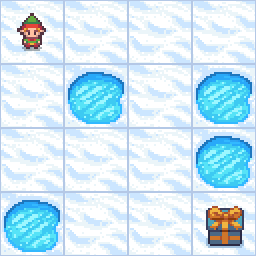

In [ ]:
video_path="/content/replay.gif"
video_fps=1
record_video(env, q_table, video_path, video_fps)

from IPython.display import Image
Image('./replay.gif')